$$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 20165549\ \ JANG\ \ JAE\ \ YONG$$

Build a binary classifier for human versus horse based on logistic regression using the dataset that consists of human and horse images

The dataset consists of human images and horse images for the training and the validation

The classifier should be trained using the training set

The classifier should be tested using the validation set

In [20]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os

import timeit

transform = transforms.Compose([#transforms.Resize((256,256)),  
                                transforms.Grayscale(),
    # the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])


#train_data_path = 'relative path of training data set'
train_data_path = 'horse-or-human/horse-or-human/train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False, num_workers=1)  

validation_data_path = 'horse-or-human/horse-or-human/validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
valloader = torch.utils.data.DataLoader(valset, batch_size=1, shuffle=False, num_workers=1)  

NUM_EPOCH = range(1) # my code

#
# Image size and number of data
#
image_size = 10000
train_count = 1027
validation_count = 256

train_label = np.empty(train_count, dtype=float)
train_data = np.ones((train_count, image_size + 1), dtype=float)

validation_label = np.empty(validation_count, dtype=float)
validation_data = np.ones((validation_count, image_size + 1), dtype=float)

for epoch in (NUM_EPOCH):
    # load training images of the batch size for every iteration
    for i, data in enumerate(trainloader):

        # inputs is the image
        # labels is the class of the image
        inputs, labels = data

        # if you don't change the image size, it will be [batch_size, 1, 100, 100]
        #print(inputs.shape)

        # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
        #print(labels)
        
        train_label[i] = int(labels)
        train_tmp = np.asfarray(inputs)
        train_data[i, :10000] = train_tmp[0, 0, :, :].reshape(10000)
        
    # load validation images of the batch size for every iteration
    for i, data in enumerate(valloader):
        
        # inputs is the image
        # labels is the class of the image
        inputs, labels = data

        # if you don't change the image size, it will be [batch_size, 1, 100, 100]
        #print(inputs.shape)

        # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
        #print(labels)
        
        validation_label[i] = int(labels)
        validation_tmp = np.asfarray(inputs)
        validation_data[i, :10000] = validation_tmp[0, 0, :, :].reshape(10000)

In [21]:
np.random.seed(1)

learningRate = 10**(-5)
delta = 10**(-9)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def loss_function(t, y):
    return -np.sum(t*np.log(y+delta) + (1-t)*np.log(1-y+delta)) 

iteration = 5000

d = np.empty(train_count, dtype=float)
w = np.empty(image_size + 1, dtype=float)

loss_arr = np.zeros(iteration, dtype=float)
t_loss_arr = np.zeros(iteration, dtype=float)
loss_value_arr = np.zeros(iteration, dtype=float)
t_loss_value_arr = np.zeros(iteration, dtype=float)
iteration_time = np.zeros(iteration, dtype=float)

for i in range(image_size + 1):
    w[i] = np.random.rand(1)

for iter in range(iteration):
    
    start = timeit.default_timer()

    
    for i in range(train_count):
        d[i] = sigmoid(w[:].dot(train_data[i, :])) - train_label[i]

    for i in range(image_size + 1):
        w[i] = w[i] - learningRate * np.sum(d[:].dot(train_data[:, i]))
   
    loss_value = 0
    t_loss_value = 0
    training_loss = 0
    testing_loss = 0
    
    for i in range(train_count):
        loss_value += loss_function(train_label[i], sigmoid(w[:].dot(train_data[i, :])))

        if train_label[i] == 1:
            if sigmoid(w[:].dot(train_data[i, :])) <= 0.5: # loss count
                training_loss += 1

        else:
            if sigmoid(w[:].dot(train_data[i, :])) > 0.5: # loss count
                training_loss += 1

    for i in range(validation_count):
        t_loss_value += loss_function(validation_label[i], sigmoid(w[:].dot(validation_data[i, :])))
        if validation_label[i] == 1:
            if sigmoid(w[:].dot(validation_data[i, :])) <= 0.5: # loss count
                testing_loss += 1

        else:
            if sigmoid(w[:].dot(validation_data[i, :])) > 0.5: # loss count
                testing_loss += 1

    if iter % 1000 == 0:
        print("iter =", iter)
        print("train loss count =", training_loss)
        print("train loss value =", loss_value)
        print("validation loss count =", testing_loss)
        print("validation loss value =", t_loss_value)
        
    
    loss_value_arr[iter] = loss_value
    t_loss_value_arr[iter] = t_loss_value
    loss_arr[iter] = training_loss
    t_loss_arr[iter] = testing_loss
    
    stop = timeit.default_timer()
    
    iteration_time[iter] = stop - start
    
    if iter % 1000 == 0:
        print(iter, 'iteration time =', iteration_time[iter])

iter = 0
train loss count = 500
train loss value = 10361.63291794603
validation loss count = 128
validation loss value = 2652.5780270011383
0 iteration time = 0.2666936999994505
iter = 1000
train loss count = 185
train loss value = 518.7647288721199
validation loss count = 47
validation loss value = 198.2042508926666
1000 iteration time = 0.38927719999992405
iter = 2000
train loss count = 118
train loss value = 283.0364509697672
validation loss count = 53
validation loss value = 223.15581058009266
2000 iteration time = 0.3916592999994464
iter = 3000
train loss count = 73
train loss value = 187.55118940919184
validation loss count = 59
validation loss value = 234.6191590434003
3000 iteration time = 0.3475811000007525
iter = 4000
train loss count = 47
train loss value = 136.4186774541487
validation loss count = 61
validation loss value = 243.94728923705716
4000 iteration time = 0.4340486000000965


Plot training Loss and Accuracy

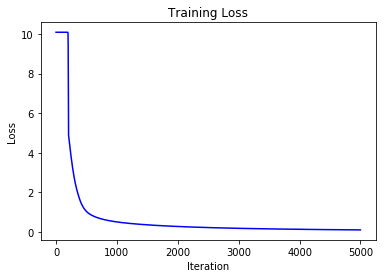

In [41]:
x = range(iteration)
y = loss_value_arr[x] / train_count

plt.plot(x, y, "BLUE")
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

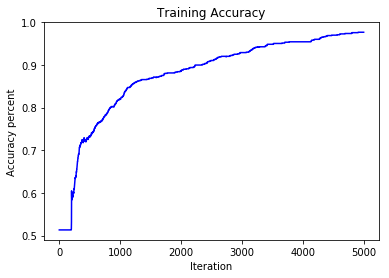

In [34]:
x = range(iteration)
y = (train_count - loss_arr[x]) / train_count

plt.plot(x, y, "BLUE")
plt.title('Training Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy percent')
plt.show()

Plot Validation Loss and Accuracy

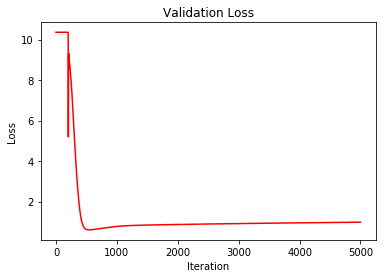

In [42]:
x = range(iteration)
y = t_loss_value_arr[x] / validation_count

plt.plot(x, y, "RED")
plt.title('Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

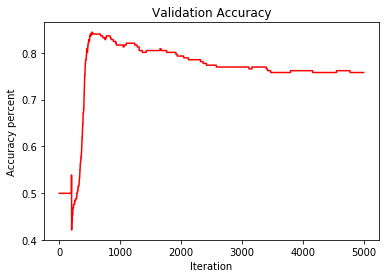

In [36]:
x = range(iteration)
y = (validation_count - t_loss_arr[x]) / validation_count

plt.plot(x, y, "RED")
plt.title('Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy percent')
plt.show()

Plot Training and Validation at every iteration

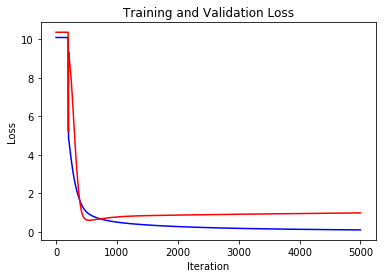

In [40]:
x = range(iteration)
y1 = loss_value_arr[x] / train_count
y2 = t_loss_value_arr[x] / validation_count

plt.plot(x, y1, "BLUE")
plt.plot(x, y2, "RED")
plt.title('Training and Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

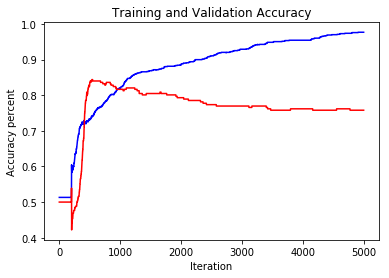

In [39]:
x = range(iteration)
y1 = (train_count - loss_arr[x]) / train_count
y2 = (validation_count - t_loss_arr[x]) / validation_count

plt.plot(x, y1, "BLUE")
plt.plot(x, y2, "RED")
plt.title('Training and Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy percent')
plt.show()

Present the table for the final accuracy and loss with training and validation datasets as below:

In [46]:
print ('Final Training Loss =', loss_value_arr[iteration - 1] / train_count)
print ('Final Training Accuracy =', (train_count - loss_arr[iteration - 1]) / train_count * 100, '%')
print ('Final Validation Loss =', t_loss_value_arr[iteration - 1] / validation_count)
print ('Final Validation Accuracy =', (validation_count - t_loss_arr[iteration - 1]) / validation_count * 100, '%')

Final Training Loss = 0.10260832378422415
Final Training Accuracy = 97.6630963972736 %
Final Validation Loss = 0.9855954202361976
Final Validation Accuracy = 75.78125 %


In [72]:
import pandas as pd

idx1 = round(loss_value_arr[iteration - 1] / train_count, 6)
idx2 = str(round((train_count - loss_arr[iteration - 1]) / train_count * 100, 2)) + ' %'
idx3 = round(t_loss_value_arr[iteration - 1] / validation_count, 6)
idx4 = str(round((validation_count - t_loss_arr[iteration - 1]) / validation_count * 100, 2)) + ' %'

df = pd.DataFrame(data=np.array([[idx1, idx2], [idx3, idx4]]), index= ['Training', 'Validation'], columns=['Loss', 'Accuracy'])
display(df)

,Loss,Accuracy
Training,0.102608,97.66 %
Validation,0.985595,75.78 %


Execution Time per Iteration

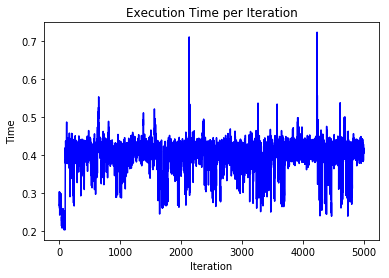

In [75]:
x = range(iteration)
y = iteration_time[x]
plt.plot(x, y, "BLUE")
plt.title('Execution Time per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.show()

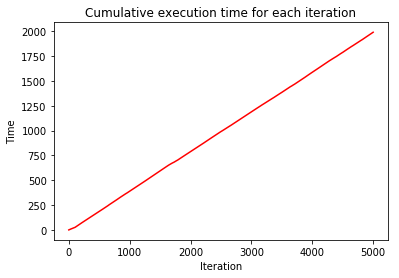

In [76]:
accumulate = np.zeros(iteration, dtype=float)  # Cumulative execution time

for i in range(iteration):
    for j in range(i + 1):
        accumulate[i] += iteration_time[j]

x = range(iteration)
y = accumulate[x]

plt.plot(x, y, "RED")
plt.title('Cumulative execution time for each iteration')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.show()